<a href="https://colab.research.google.com/github/ssssuyeon/TensorFlow-Tutorial/blob/ML-basics-with-Keras/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#**패션 MNIST 데이터셋 임포트, 데이터 탐색

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#훈련하는데 60,0000개의 이미지 사용, 10,000개의 이미지로 평가

In [3]:
(train_images, train_labels)

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
len(train_images)

60000

In [6]:
len(test_images)

10000

In [ ]:
#train_images, train_labels, test_images, test_labels 네 개의 numpy배열

In [ ]:
#이미지는 28X28 크기의 넘파이 배열, 픽셀 값은 0과 255사이, label은 0에서 9까지의 정수 배열

In [7]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장

In [8]:
train_images.shape

(60000, 28, 28)

In [ ]:
#훈련 세트에 60,000개의 이미지, 각 이미지는 28X28픽셀로 표현된다는 것을 보여줌

In [9]:
train_labels.shape

(60000,)

In [ ]:
len(train_labels)

60000

In [ ]:
#훈련 세트에는 60,000개의 레이블이 있다

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#각 레이블은 0과 9사이의 정수

In [11]:
test_images.shape

(10000, 28, 28)

In [ ]:
#테스트 세트에는 10,000개의 이미지, 이 이미지도 28X28픽셀로 표현

In [12]:
len(test_labels)

10000

In [ ]:
#테스트 세트는 10,000개의 이미지에 대한 레이블을 갖고있다

In [ ]:
#**데이터 전처리**

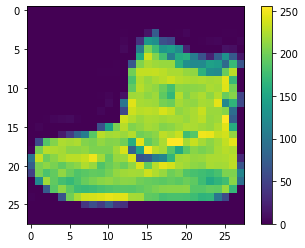

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#네트워크를 훈련하기 전에 데이터를 전처리해야 함, 훈련 세트에 있는 첫 번째 이미지 확인 및 픽셀의 범위가 0~255사이 확인

In [ ]:
#각 줄마다 함수 뜻 알기

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#신경망 모델에 주입하기 전에 픽셀 값의 범위를 0~1 사이로 조정 

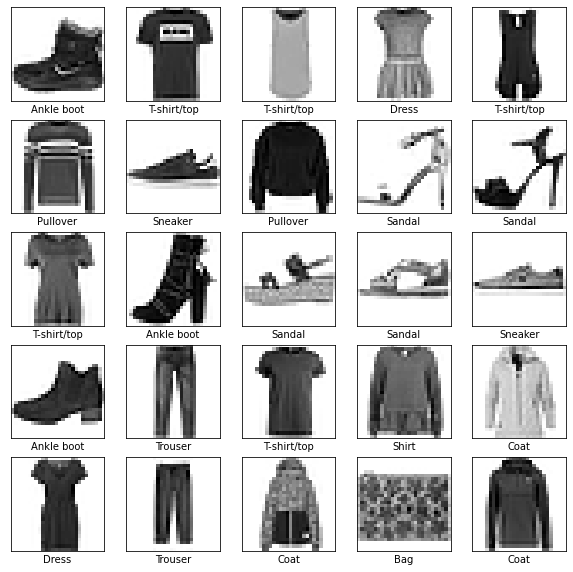

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#훈련 세트에서 처음 25개 이미지와 그 클래스 이름을 출력, 데이터 포맷이 올바른지 확인

In [ ]:
#왜 흑백이지, 각 줄마다 함수 뜻 알기 (전처리 : 0~1사이로 조정, 훈련 세트 이미지마다 클래스 이름 지정)

In [ ]:
#**모델 구성**

In [ ]:
#신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#신경망의 기본 구성 요소는 층(layer)
#tf.keras.layers.Dense 같은 층들의 가중치(parameter)는 훈련하는 동안 학습

In [ ]:
#tf.keras.layer.Flatten은 2차원 배열의 이미지 포맷을 28X28=784픽셀의 1차원 배열로 변환
#이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘린다. 학습되는 가중치없이 데이터를 변환하기만 함

#첫 번째 Dense층은 128개의 노드(뉴런)를 가짐
#두 번째 층은 10개의 노드의 소프트맥스(softmax)층 
# -> 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1, 각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률을 출력

In [ ]:
#식에서는 keras인데 tf.keras라고 안해도 되는가
#Flatten을 하는 이유
#첫 번째 Dense층에서 노드 수를 128개로 설정한 이유

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가 됨
#     손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정, 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 함
#     옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
#     지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용, 여기에서는 올바르게 분류된 이미지의 비율인 정확도를 사용

In [ ]:
#각 인자들을 제대로 이해할 수 있도록 함

In [ ]:
#**모델 훈련**

In [18]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6375 - accuracy: 0.7790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3847 - accuracy: 0.8620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3162 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8926


In [ ]:
#훈련을 하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습 
#모델이 훈련되면서 손실과 정확도 지표가 출력 -> 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성

In [ ]:
#Epoch 아래에 있는 1875는 무슨 의미? => batch size는 기본적으로 32이므로 60000/32=1875
#마지막 epoch방식을 습득하고 그 방식을 테스트에 적용하는 건가?

In [ ]:
#**정확도 평가**

In [19]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3500 - accuracy: 0.8743


[0.35000142455101013, 0.8743000030517578]

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3500 - accuracy: 0.8743

테스트 정확도: 0.8743000030517578


In [ ]:
#테스트 세트에서 모델의 성능을 비교

#테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮음 -> 과대적합(overfitting),,,?

In [ ]:
#verbose=2 조사하기

In [ ]:
#**예측 만들기**

In [21]:
predictions = model.predict(test_images)

In [ ]:
#훈련된 모델을 사용하여 이미지에 대한 예측 만들기, 테스트 세트에 있는 각 이미지의 레이블을 예측

In [22]:
predictions[0]

array([3.5084067e-06, 2.2304000e-08, 7.6718024e-08, 1.0723158e-07,
       2.9060772e-07, 1.5616589e-02, 2.2896927e-06, 3.3609629e-02,
       1.2153823e-04, 9.5064604e-01], dtype=float32)

In [ ]:
#첫 번째 예측 확인, 이 예측은 10개의 숫자 배열로 나타남, 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄

In [23]:
np.argmax(predictions[0])

9

In [ ]:
#가장 높은 신뢰도를 가진 레이블 찾기

In [ ]:
#np.argmax() 가 무슨 함수인지 조사 -> array중에 가장 큰 값의 index

In [24]:
test_labels[0]

9

In [ ]:
#예측이 맞는지 테스트 레이블을 확인

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  #첫 번째 사용자 함수는 왼쪽 그림, 두 번째 사용자 함수는 오른쪽 그림

In [ ]:
#10개 클래스에 대한 예측을 모두 그래프로 표현

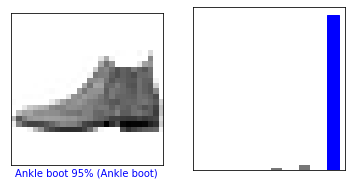

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
#0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인

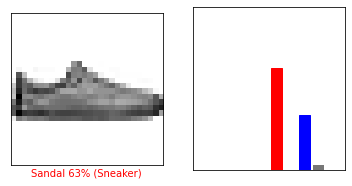

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
#올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨강색
#숫자는 예측 레이블의 신뢰도 퍼센트, 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

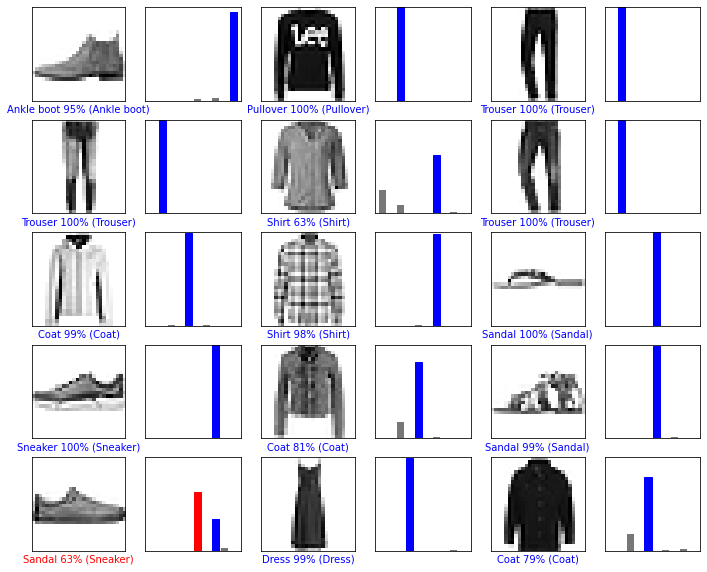

In [29]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
#홀수 열은 첫 번째 사용자 함수 사용, 짝수 열은 두 번째 사용자 함수 사용

In [30]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)
#이미지 하나만 예측할 때는 차원이 늘려줘야 한다

(28, 28)


In [ ]:
#훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듬

In [31]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
#tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는 데 최적화되어 있음
#하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.50840628e-06 2.23039969e-08 7.67180168e-08 1.07231564e-07
  2.90608540e-07 1.56166106e-02 2.28969657e-06 3.36096324e-02
  1.21538433e-04 9.50645924e-01]]


In [33]:
predictions_single.shape

(1, 10)

In [34]:
predictions_single[0]

array([3.50840628e-06, 2.23039969e-08, 7.67180168e-08, 1.07231564e-07,
       2.90608540e-07, 1.56166106e-02, 2.28969657e-06, 3.36096324e-02,
       1.21538433e-04, 9.50645924e-01], dtype=float32)

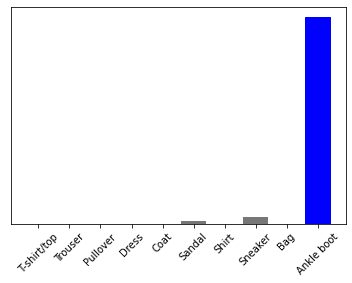

In [35]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
#rotation은 글자 크기를 45도 회전

In [36]:
np.argmax(predictions_single[0])

9

In [ ]:
#model.predict는 2차원 넘파이 배열을 반환하므로 첫 번재 이미지의 예측을 선택
#근데 이 방법은 어떤 함수때문에 첫 번째 이미지만 가능!!! -> 무슨 함수였는지 세미나 준비할 때 알았는 데 까먹